# <font>Big Data Real-Time Analytics com Python e Spark</font>

## <font>Análise Exploratória, Data Wrangling, Engenharia de Atributos e Pré-Processamento de dados de E-Commerce Analytics</font>

<img src="imagens/ecommerce.jpg" alt="Alt text" width="650"/>

## Definição do problema e fonte de dados

Uma empresa internacional de comércio eletrônico (E-commerce) que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes. Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a  compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo. Os produtos são enviados de Navio, Avião ou Caminhão, dependendo da região de entrega.

Em cada compra o cliente pode receber um desconto dependendo do peso do produto 
comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou 
problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de  compra. 
O único dado pessoal sobre o cliente que está disponível é o gênero.
Nosso trabalho neste estudo de caso é explorar os dados, compreender como estão 
organizados, detectar eventuais problemas e analisar os dados por diferentes perspectivas.
Trabalharemos com dados fictícios que representam dados reais de uma empresa de E-commerce.


## Etapas abordadas no projeto

Na análise exploratória, primeira parte do estudo de caso, iremos realizar uma análise focando nos detalhes técnicos com análise estatística, visualização  de  dados,  interpretação  de  gráficos  e  tabelas,  análise  univariada  e bivariada e relatório de conclusão. Em seguida utilizaremos estes insights para responder perguntas de negócio, onde os dados são manipulados através de Data Wrangling com Pandas e analisados por diferentes perspectivas. 

Após a análise exploratória, aplicaremos a engenharia de atributos, cujo objetivo é criar novas variáveis que ajudem a compreender o comportamento da variável alvo, em nosso caso se um produto será enviado com atraso ou não.

Por fim, aplicaremos técnicas de pré-processamento de variáveis categóricas (Label Encoding e One-Hot Encoding) e Feature Scaling de variáveis numéricas (Normalização e Padronização).O objetivo é pré-processar os dados para uma etapa de modelagem preditiva.

## Imports

In [2]:
# Versão da linguagem Python utilizada neste notebook
from platform import python_version
print(f'Versão da Linguagem Python utilizada neste notebook: {python_version()}')

Versão da Linguagem Python utilizada neste notebook: 3.9.13


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
warnings.filterwarnings("ignore")

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Carregando o Dataset

In [5]:
# Carregando os dados
df = pd.read_csv('dados/dataset.csv')

In [6]:
df.shape

(11000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [9]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
3642,3643,D,Navio,4,4,205,4,baixa,F,6,5064,0
1343,1344,F,Caminhao,4,5,218,3,baixa,M,25,2682,1
1592,1593,A,Navio,4,5,156,3,baixa,F,2,1127,1
665,666,F,Caminhao,3,3,243,2,media,M,17,3230,1
6479,6480,F,Navio,4,4,142,10,alta,F,7,4624,0


In [10]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


## Análise Exploratória - Parte 1

### Separação das Variáveis Categóricas e Numéricas

In [11]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [12]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [13]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']

In [14]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

In [15]:
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [16]:
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [17]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Algumas observações:

1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média maior do que a Mediana).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).

<AxesSubplot:>

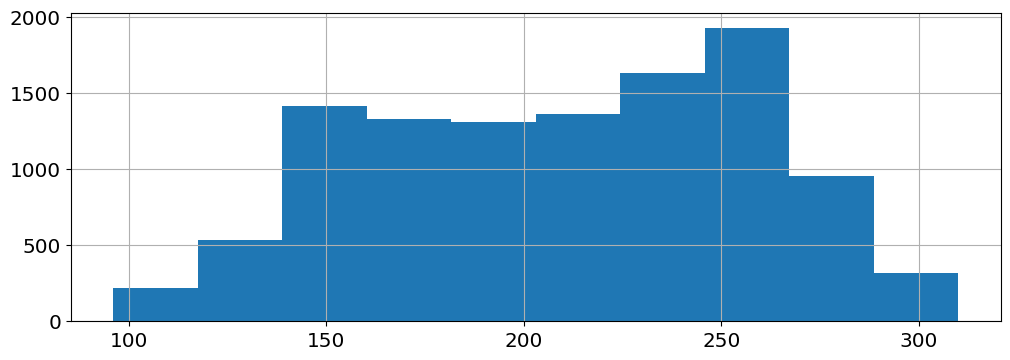

In [18]:
df['custo_produto'].hist()

<AxesSubplot:>

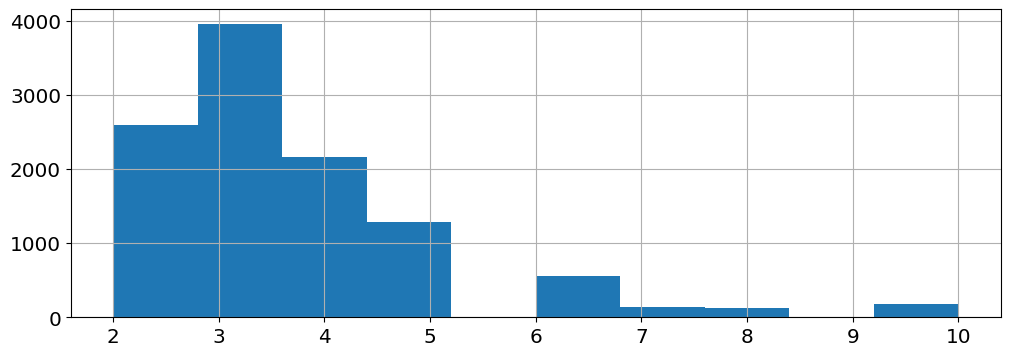

In [19]:
df['compras_anteriores'].hist()

### Explorando as Variáveis Categóricas

In [20]:
# Resumo das variáveis categóricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**

In [21]:
# Listando o total por categoria de cada variável categórica
for col in cats:
    print(f'Total de registros por categoria para a variável {col}:')
    print(df[col].value_counts())
    print()

Total de registros por categoria para a variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de registros por categoria para a variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de registros por categoria para a variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de registros por categoria para a variável genero:
F    5546
M    5454
Name: genero, dtype: int64



### Análise Univariada - Box Plots

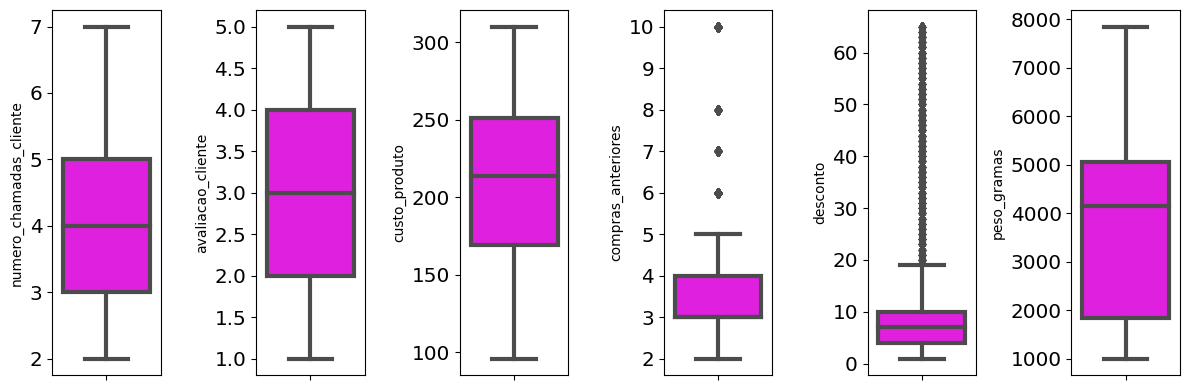

In [22]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### Análise Univariada - Dist Plots

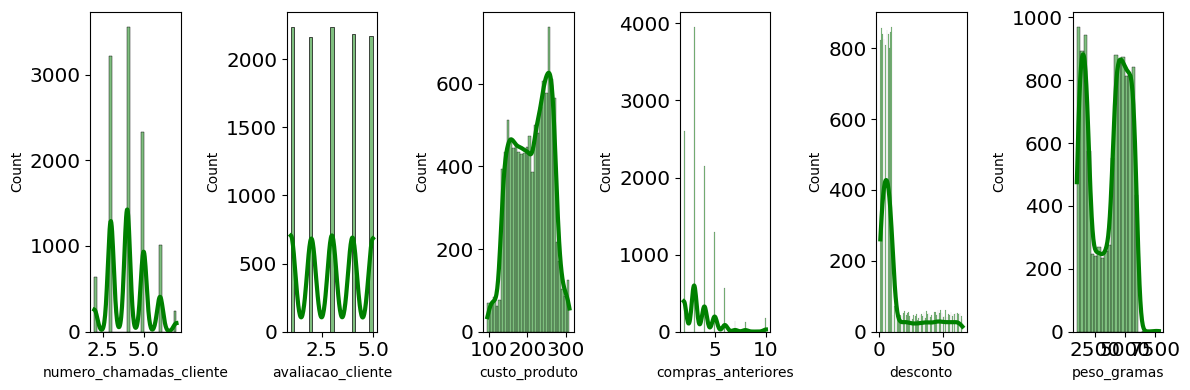

In [23]:
features = nums
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(x = df[features[i]], color = 'green', kde = True)
    plt.xlabel(features[i])
    plt.tight_layout()

### Análise Univariada - Violin Plots

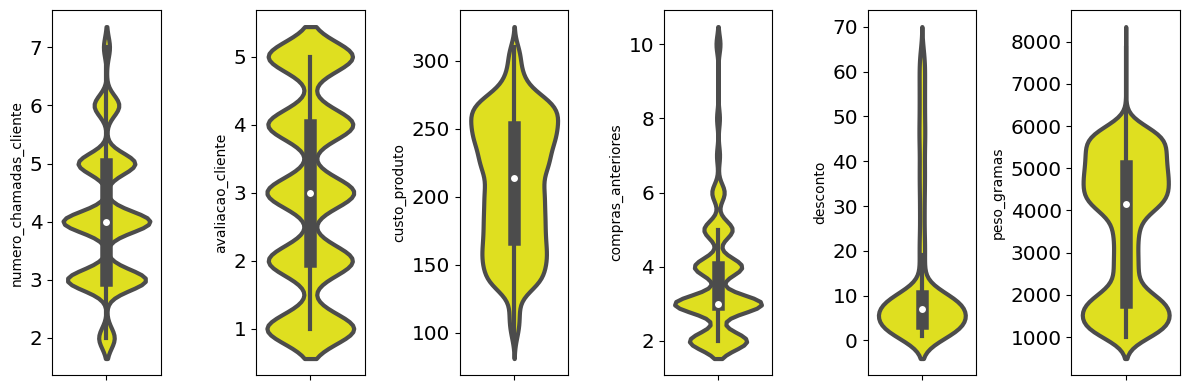

In [24]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

A partir dos gráficos pode-se observar que:

* A coluna `custo_produto` parece estar próxima de uma distribuição normal.

* Como suspeitamo, as colunas `compras_anteriores` e `desconto` estão ligeiramente *inclinadas*, o que significa que existe a possibilidade de precisarmos fazer algo com essas colunas mais tarde.

* Para a coluna `peso_gramas` há incerteza de distribuição porque é em forma de u.

* As colunas `numero_chamadas_cliente` e `avaliacao_cliente` estão distribuídas uniformemente.

### Análise Univariada - Count Plot (Categorical)

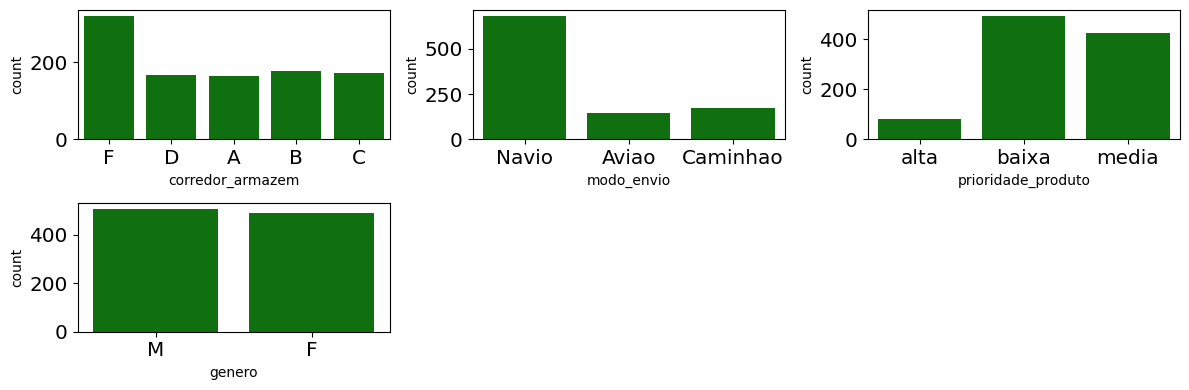

In [25]:
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

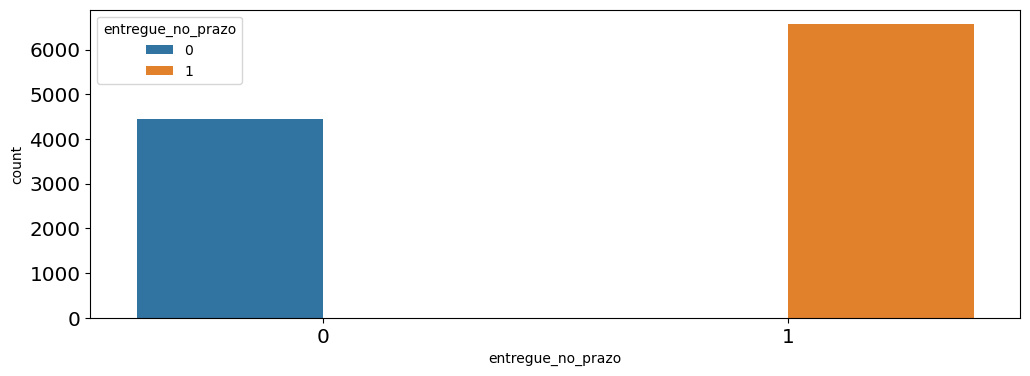

In [26]:
# Count plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo');

A partir dos gráficos pode-se observar que:

* A maioria dos produtos enviados vieram do corredor F.

* Modo de envio através de Navio é o mais comum.

* Há poucos produtos com prioridade alta de entrega.

* A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.

* A coluna `entregue_no_prazo` é binária, então não há necessidade de prestar muita atenção à forma da distribuição.


### Análise Bivariada - Mapa de Correlação

In [27]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [28]:
corr_df = df[nums].corr()

In [29]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

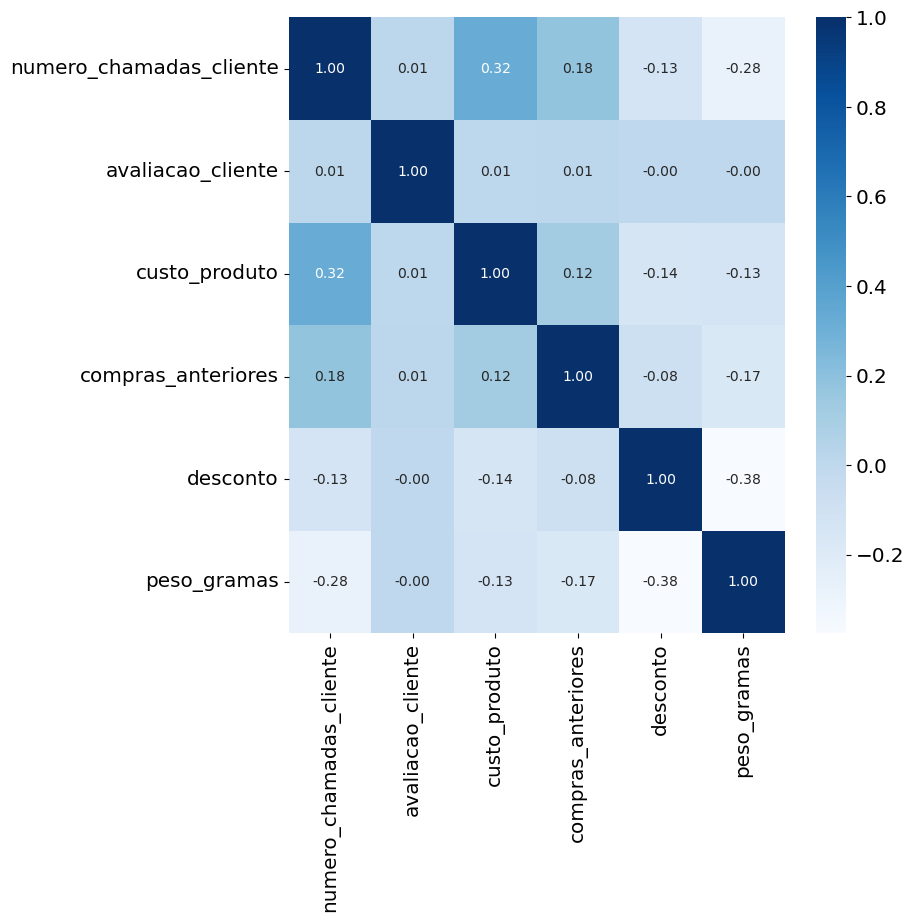

In [30]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

A partir do *mapa de correlação* acima, pode-se ver que:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.

Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

### Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

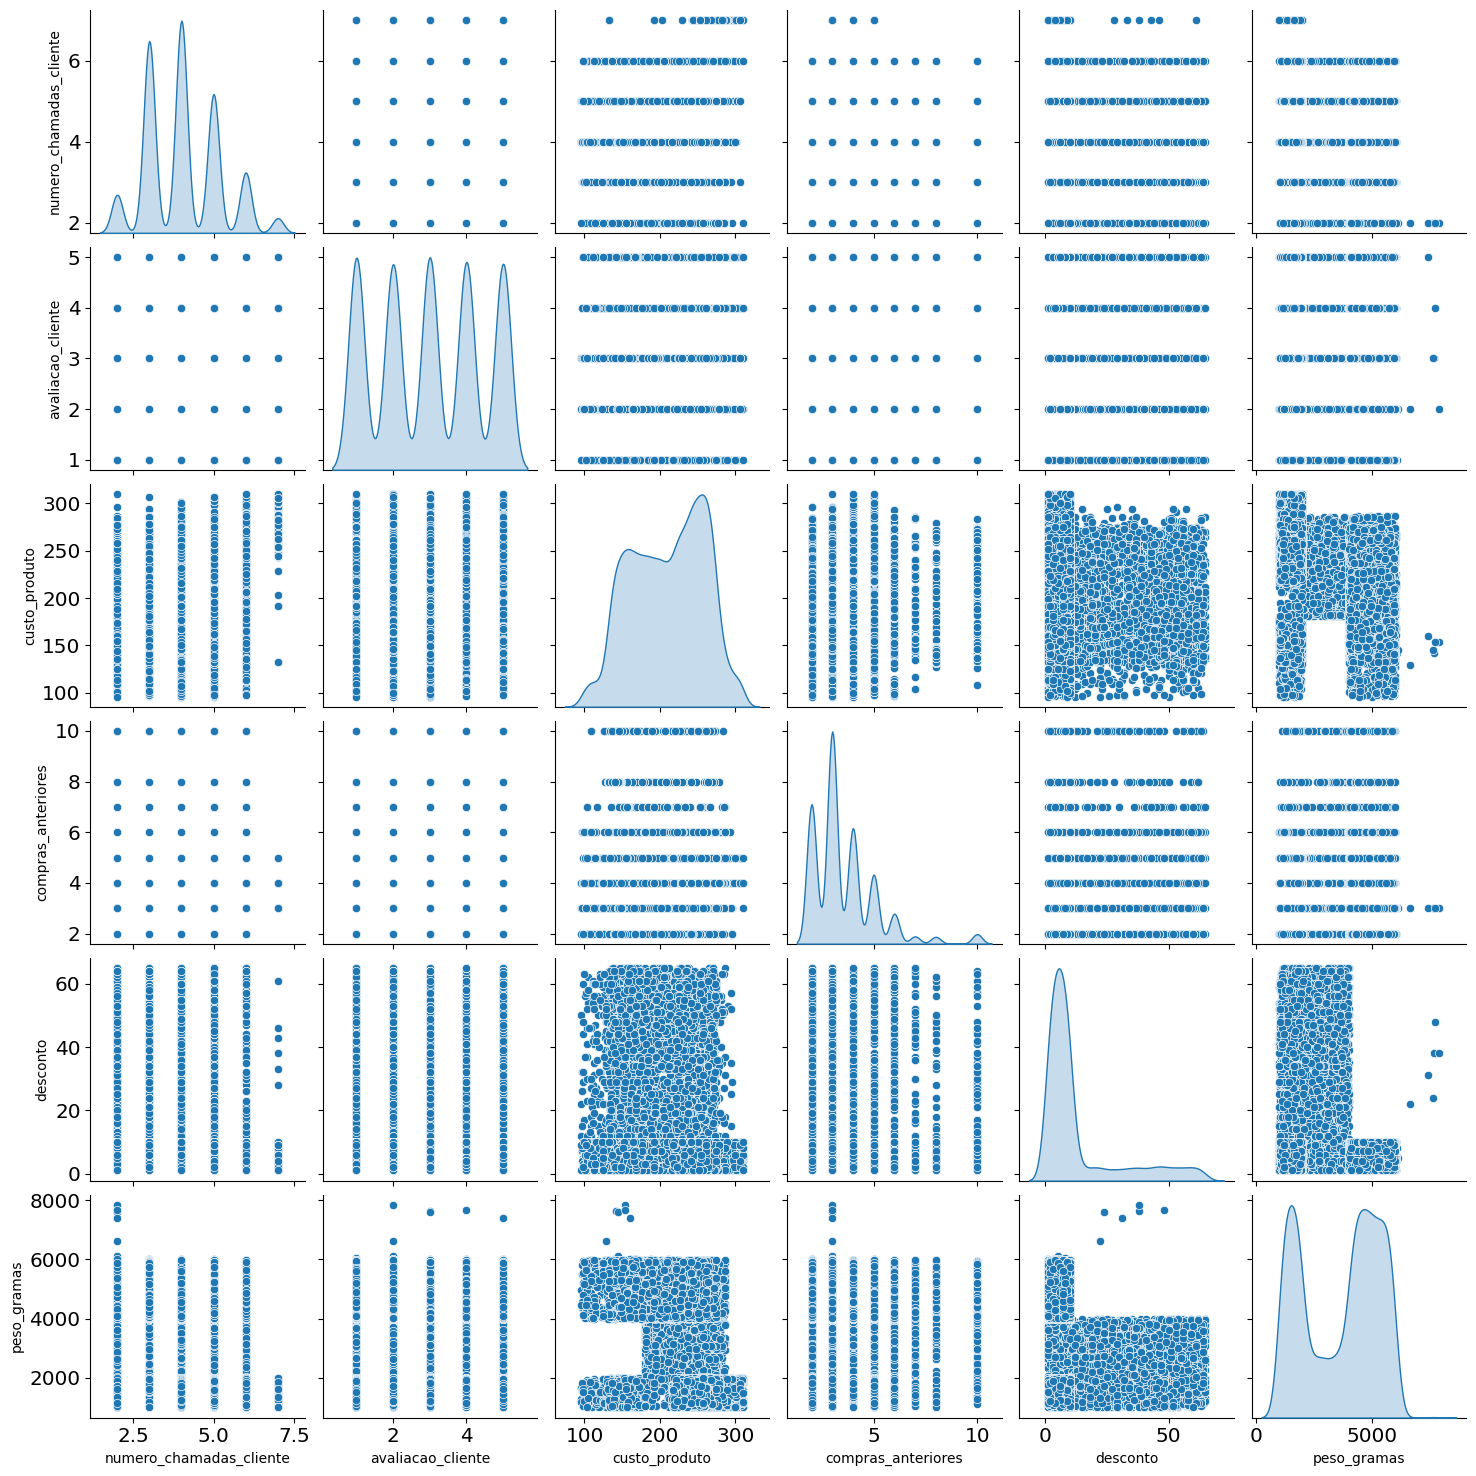

In [31]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde');

### Colunas Categóricas x Variável Target

In [32]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

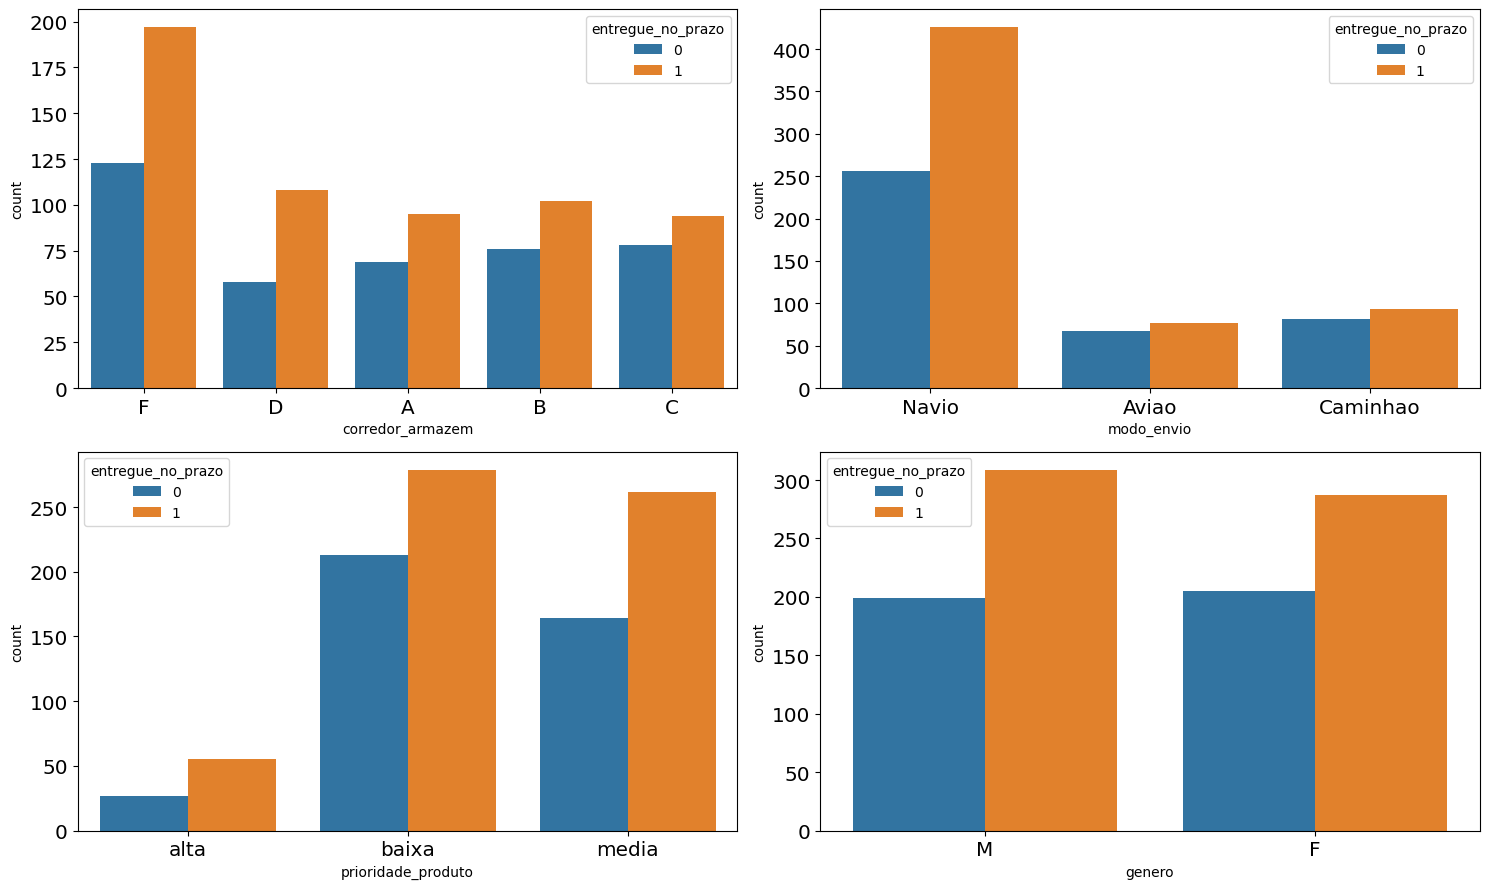

In [33]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout();

Observações:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.

## Conclusão da Análise Exploratória - Parte 1

Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos.

* Existem algumas distribuições que são um pouco *assimétricas*, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.

* Não detectamos problemas de multicolinearidade.

* Alguns *recursos* parecem completamente não correlacionados.

* Dos recursos categóricos, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

## Análise Exploratória - Parte 2 - Respondendo perguntas de negócios

### 1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [34]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [35]:
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [36]:
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID': 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [37]:
df_group2 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [38]:
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [39]:
df_group4 = df.groupby('modo_envio').agg({'ID': 'nunique'}).reset_index()
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [40]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [41]:
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y']*100
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [42]:
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [43]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

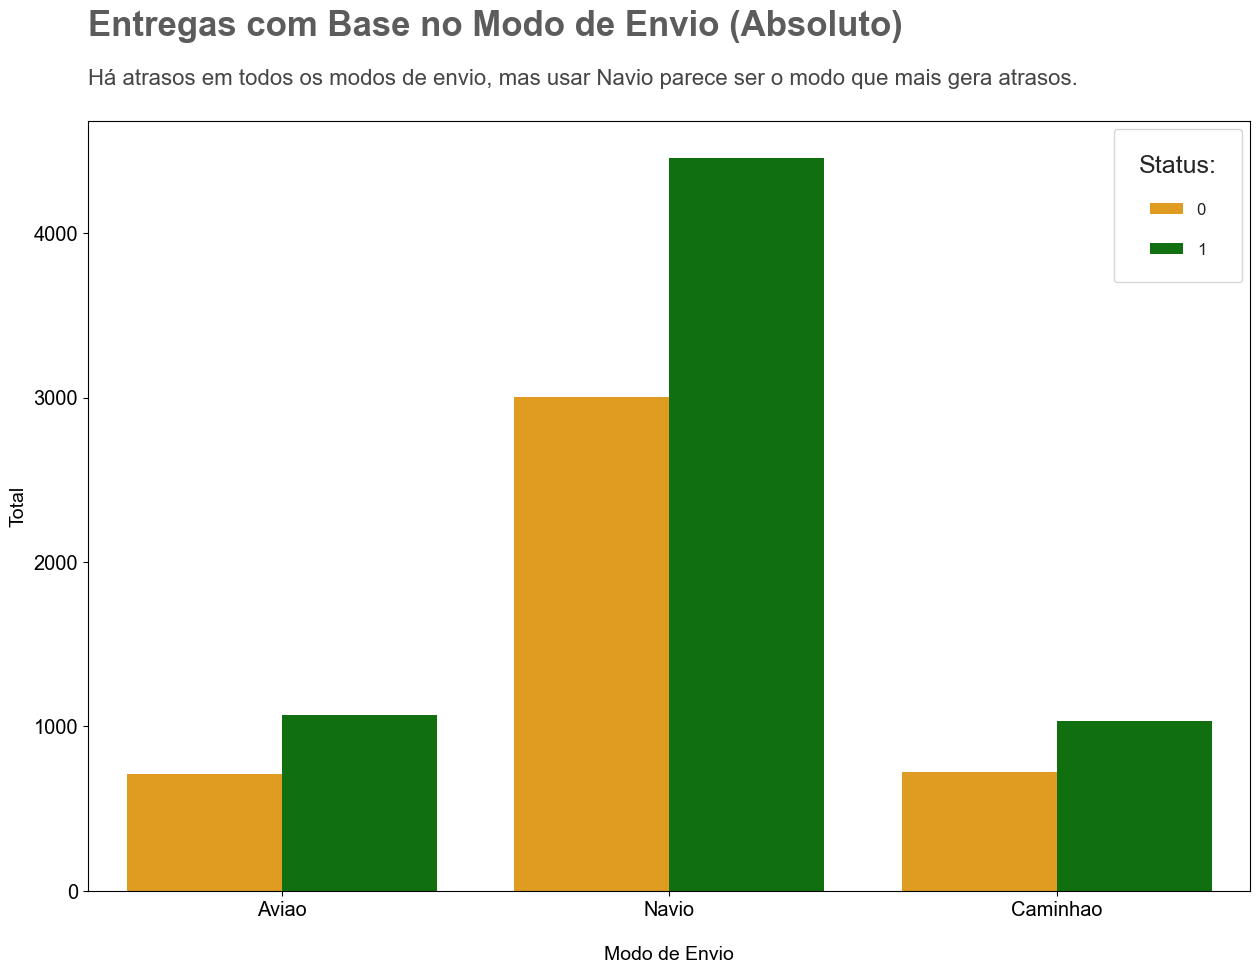

In [44]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df,
                     x = 'modo_envio',
                     hue = 'entregue_no_prazo',
                     palette = ['orange', 'green'])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)
chart.set_ylabel('Total', fontsize = 14)


# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

In [45]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

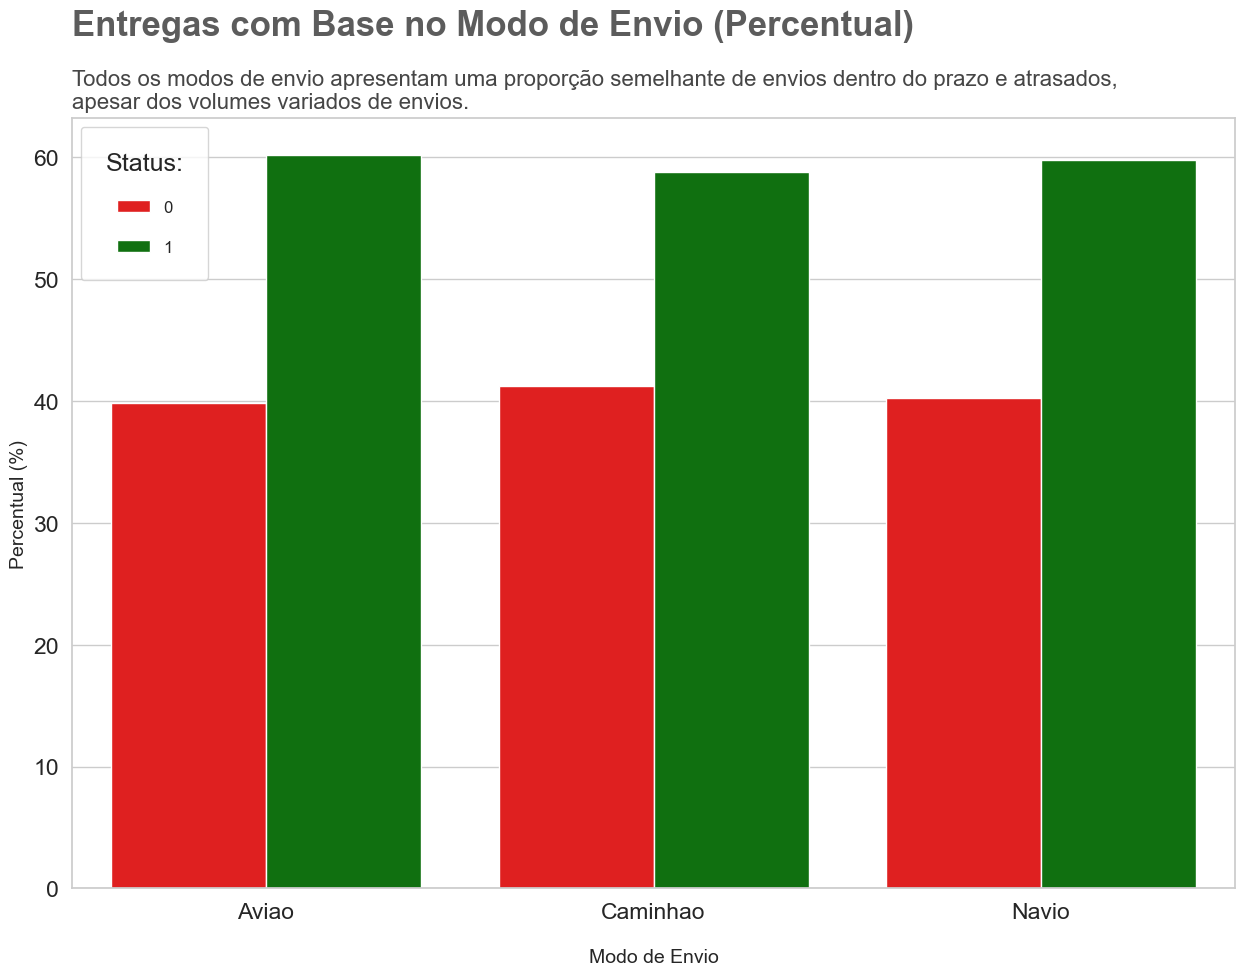

In [46]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# # Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### 2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [47]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [48]:
df_group11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID': 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [49]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [50]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [51]:
df_group14 = df.groupby('prioridade_produto').agg({'ID': 'nunique'}).reset_index()
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [52]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [53]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [54]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


In [55]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

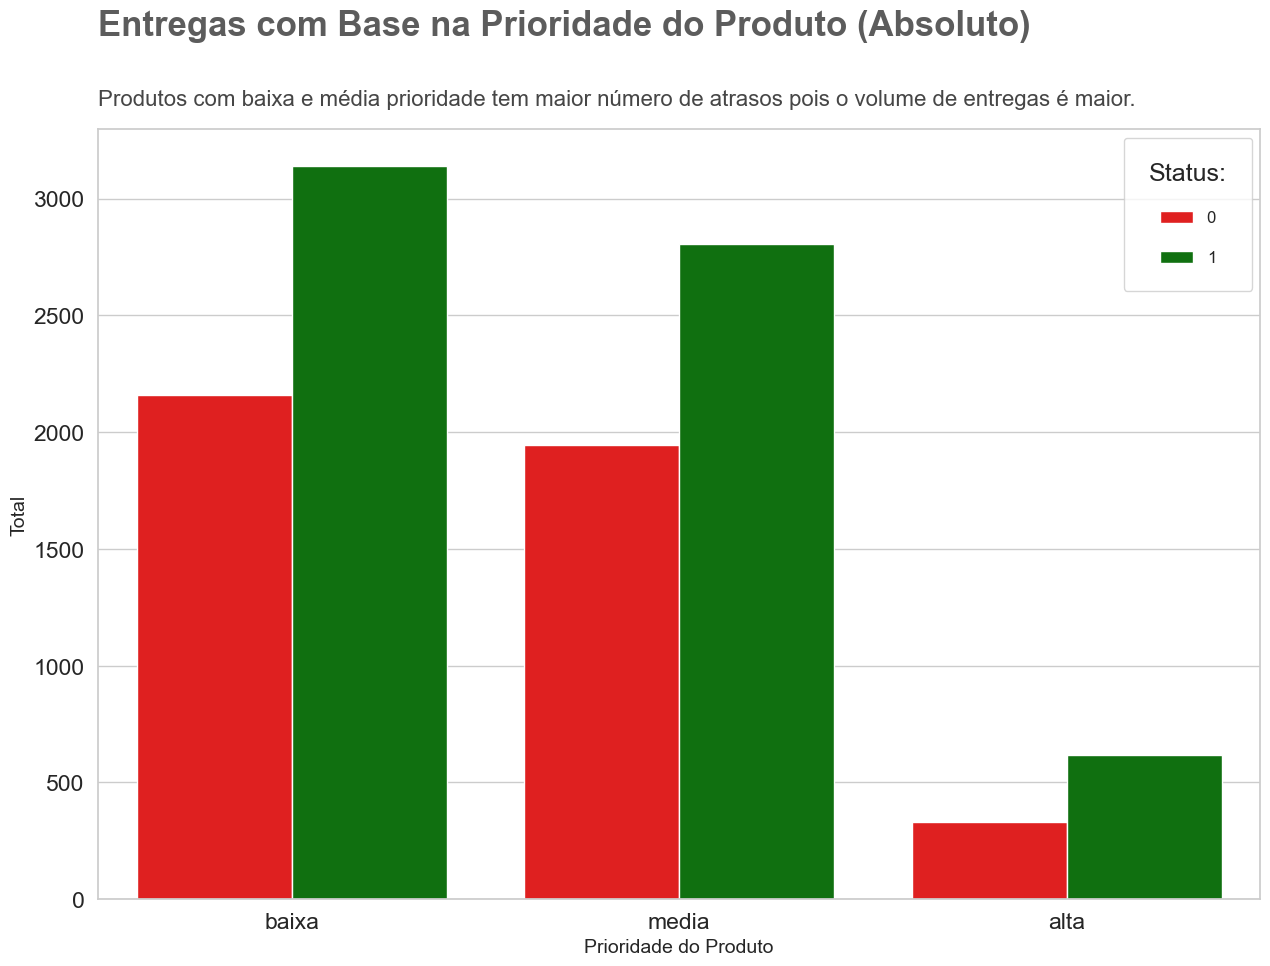

In [56]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

In [57]:
df_group15.columns

Index(['Status de Entrega no Prazo', 'Prioridade do Produto',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

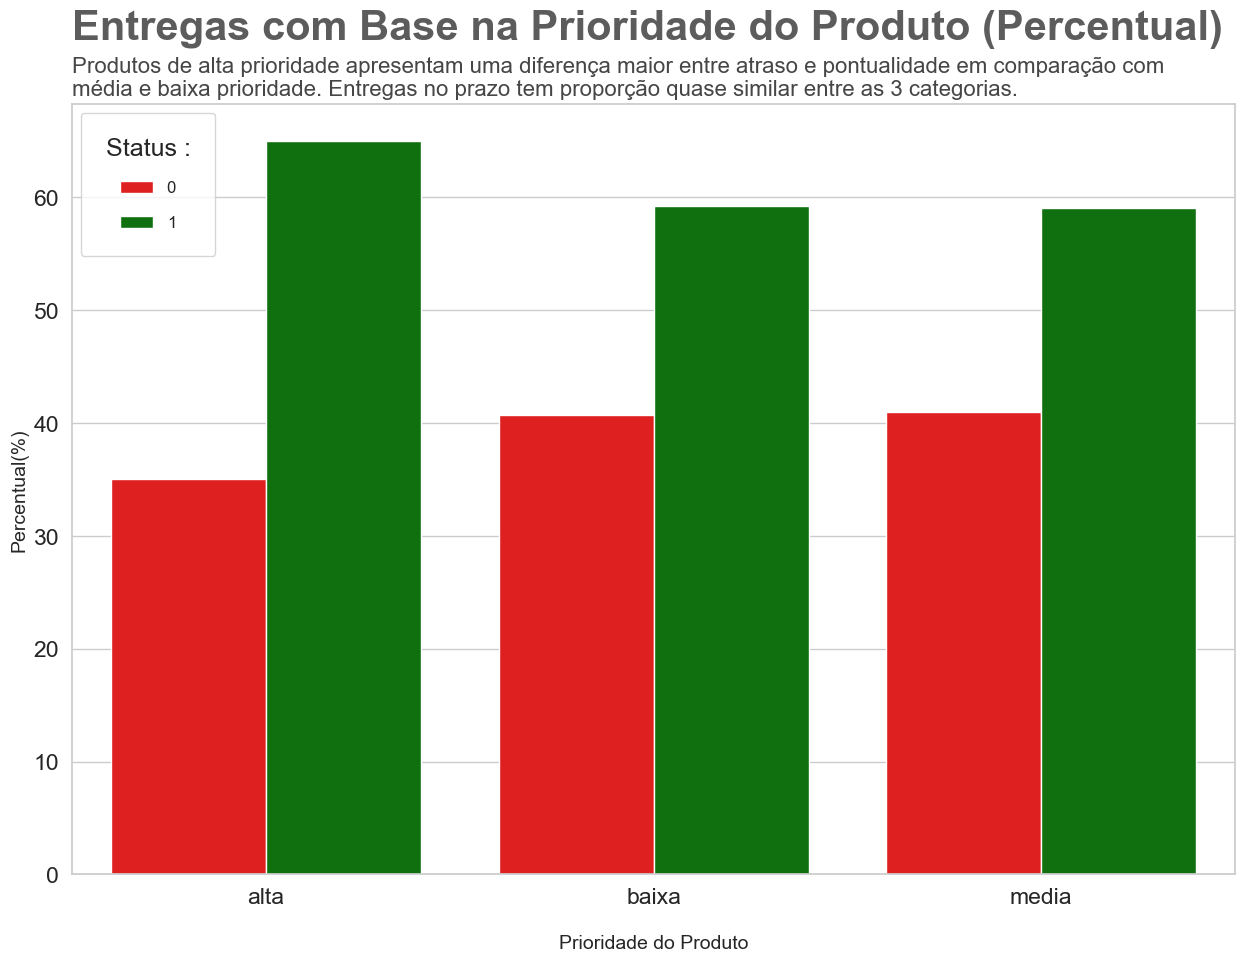

In [58]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

### 3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [59]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [60]:
df_group21 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID': 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [61]:
df_group22 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [62]:
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [63]:
df_group23['Percentual (%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [64]:
df_group24 = df.groupby('corredor_armazem').agg({'ID': 'nunique'}).reset_index()
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [65]:
df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [66]:
df_group25['Percentual (%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


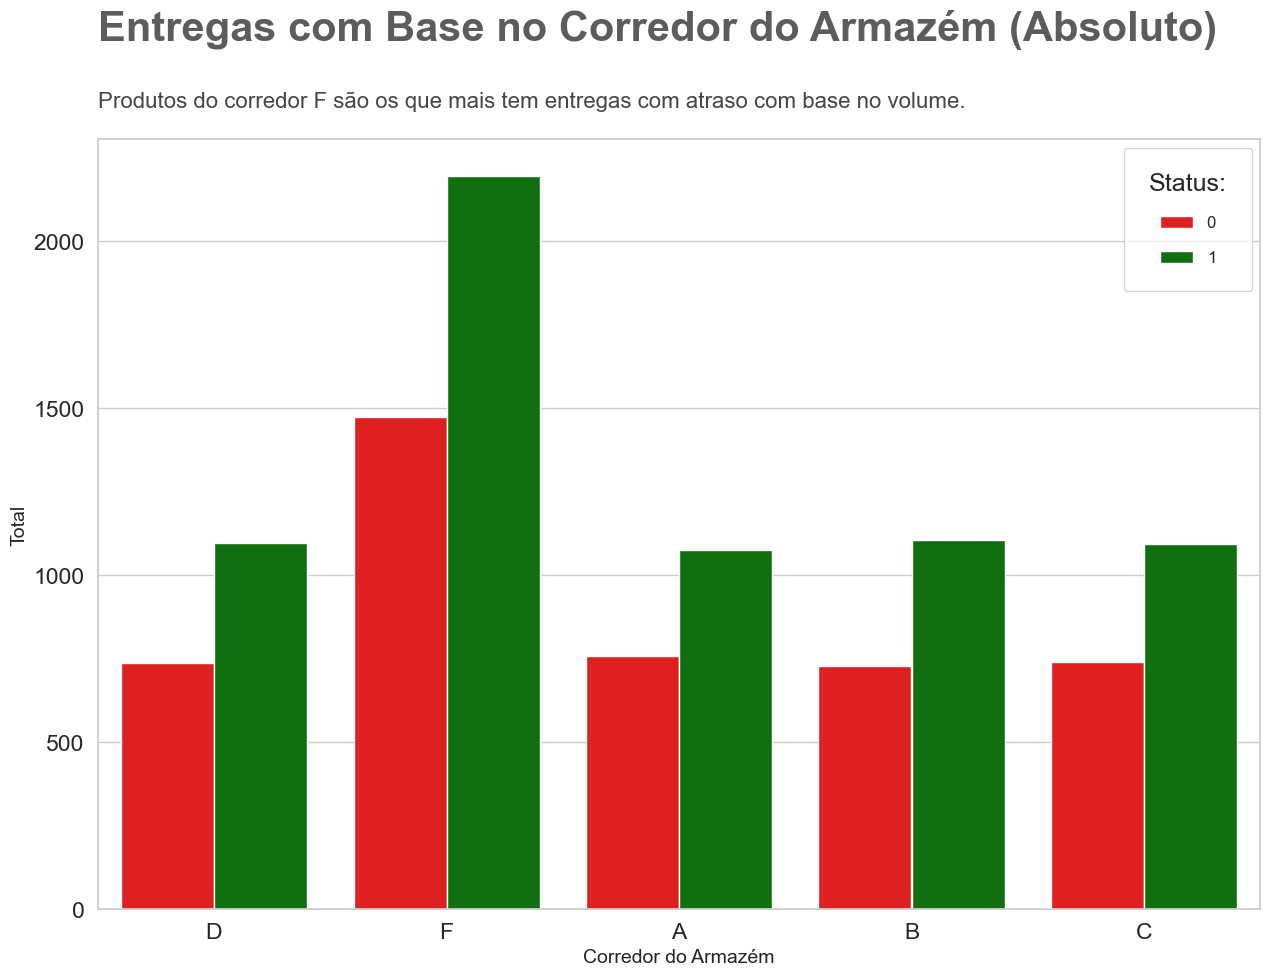

In [67]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

In [68]:
df_group25.columns

Index(['Status de Entrega no Prazo', 'Corredor do Armazem',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

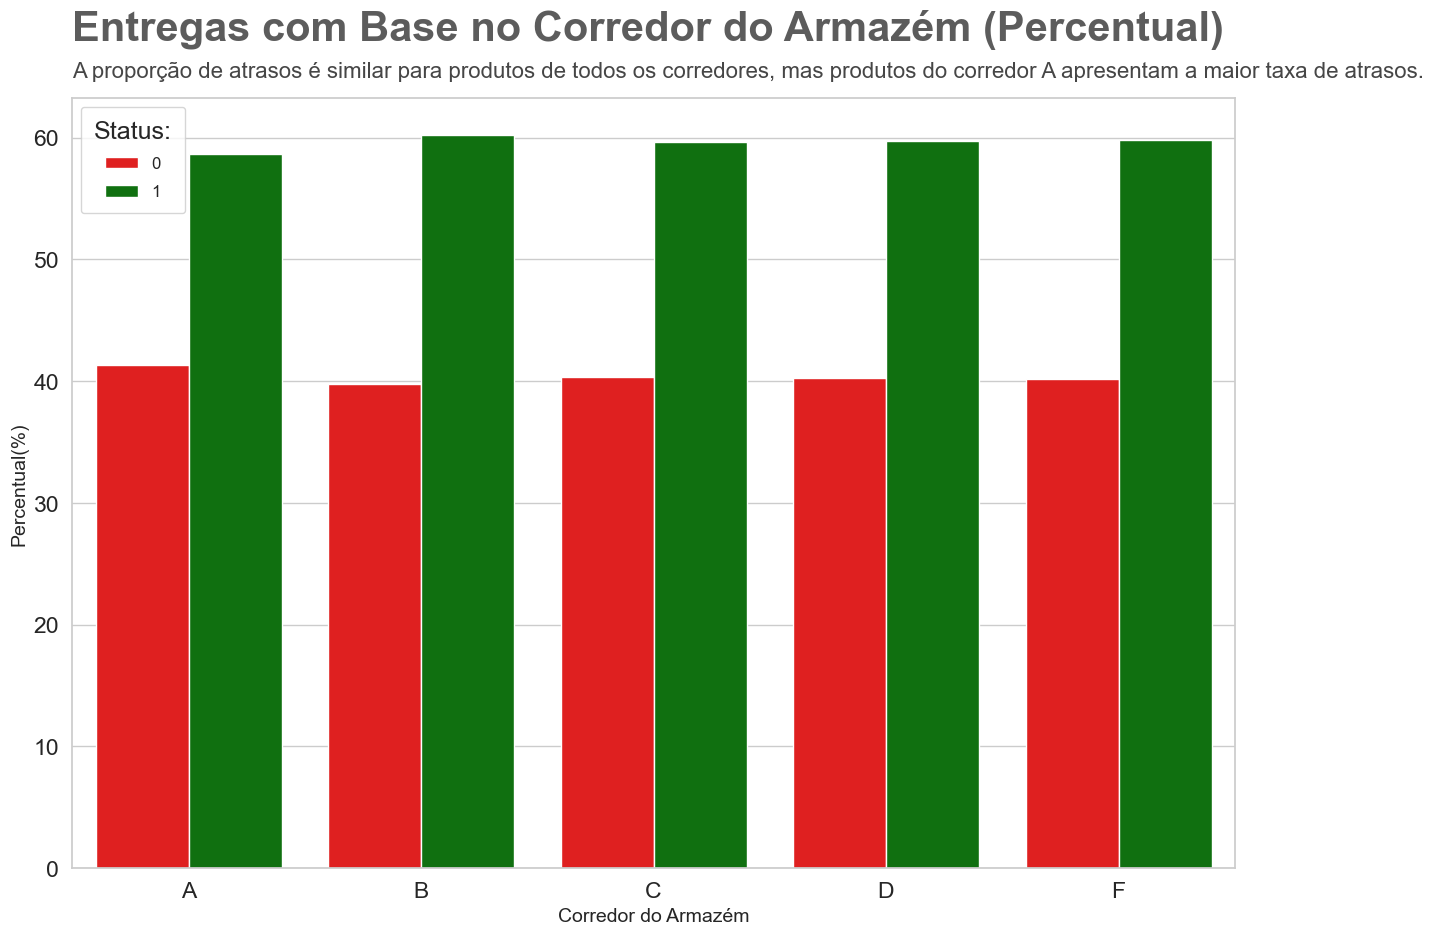

In [69]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

## Limpeza dos dados

### Tratamento de Valores Ausentes


O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [70]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [71]:
# Verifica se há valores nulos
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [72]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [73]:
# Verifica se há valores duplicados
df.duplicated().sum()

0

### Tratamento de Valores Outliers

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 

In [74]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [75]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [76]:
df.desconto.mean()

13.372545454545454

In [77]:
df.desconto.std()

16.20494287359407

<AxesSubplot:>

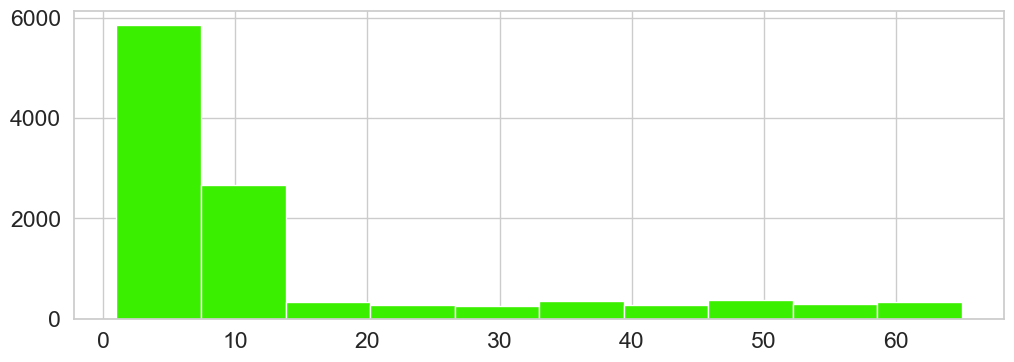

In [78]:
df.desconto.hist()

In [79]:
# Calculando os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print(f'Valor superior: {limite_superior}')
limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print(f'Valor inferior: {limite_inferior}')

Valor superior: 61.987374075327665
Valor inferior: -35.24228316623676


In [80]:
# Extraindo os registros com outliers na coluna desconto
df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [81]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [82]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 10819


In [83]:
# Uma forma inteligente de fazer esse filtro dos outliers

In [84]:
registros = np.array([True] * len(df))

In [85]:
type(registros)

numpy.ndarray

In [86]:
np.count_nonzero(registros == True)

10819

In [87]:
np.count_nonzero(registros == False)

0

In [88]:
# Variáveis numéricas (sem a variável desconto)
nums2 = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'compras_anteriores',
        'custo_produto',
        'peso_gramas']

In [89]:
# Loop por cada variável numérica
for col in nums2:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore <3) & registros

In [90]:
np.count_nonzero(registros == True)

10643

In [91]:
np.count_nonzero(registros == False)

176

In [92]:
# Removemos registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros] 

In [93]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [94]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [95]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

## Engenharia de Atributos

## Feature Selection 

Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.

In [96]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [97]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
1504,1505,C,Aviao,5,2,206,6,media,M,23,2016,1
8197,8198,F,Caminhao,4,5,216,3,media,F,7,5891,0
8167,8168,F,Navio,4,2,185,3,baixa,M,1,4786,0
10483,10484,F,Navio,4,2,253,5,media,F,3,1092,0
3490,3491,C,Navio,3,1,256,4,media,F,3,4398,1


In [98]:
# Correlação
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


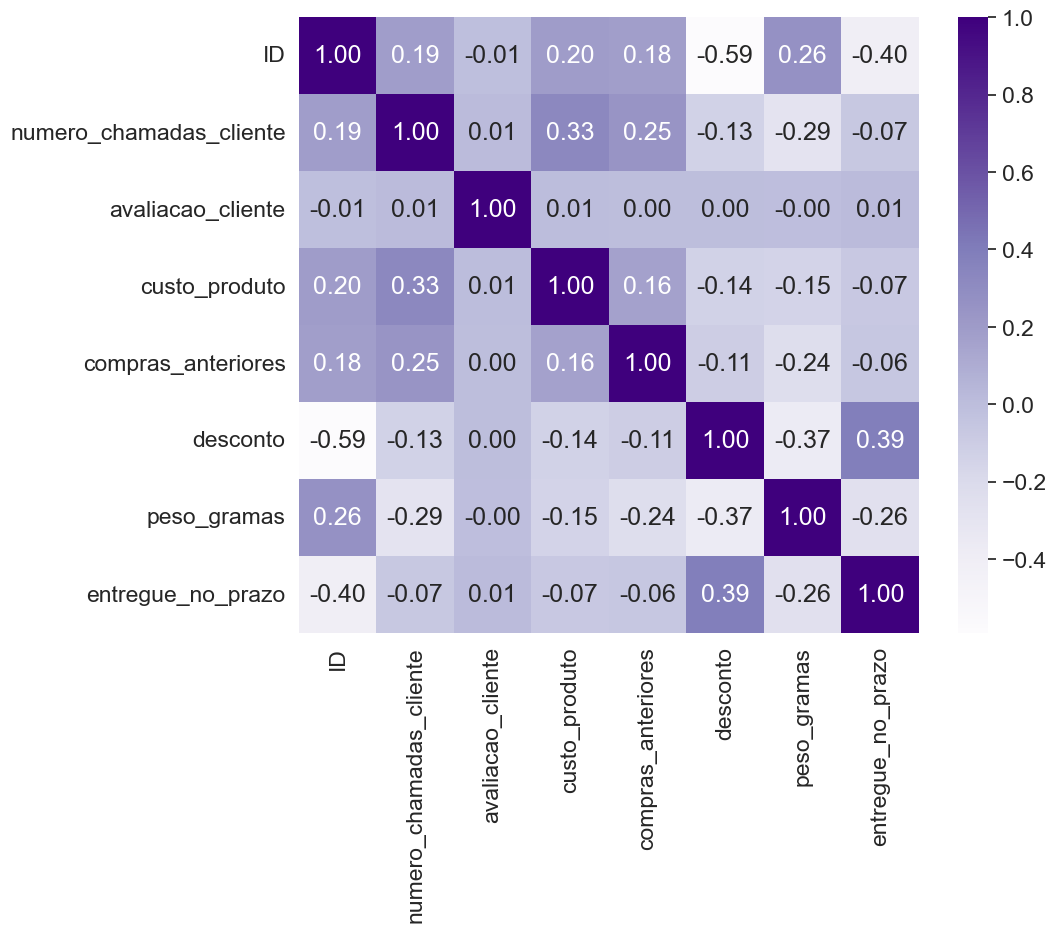

In [99]:
# Mapa de correlação
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decisão**: Na figura acima, os recursos que ultrapassaram o limite (+/- 0,05) na correlação com o recurso de destino (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável avaliacao_cliente não parece relevante e não será processada na Engenharia de Atributos. A variável ID será descartada, pois não representa informação útil.

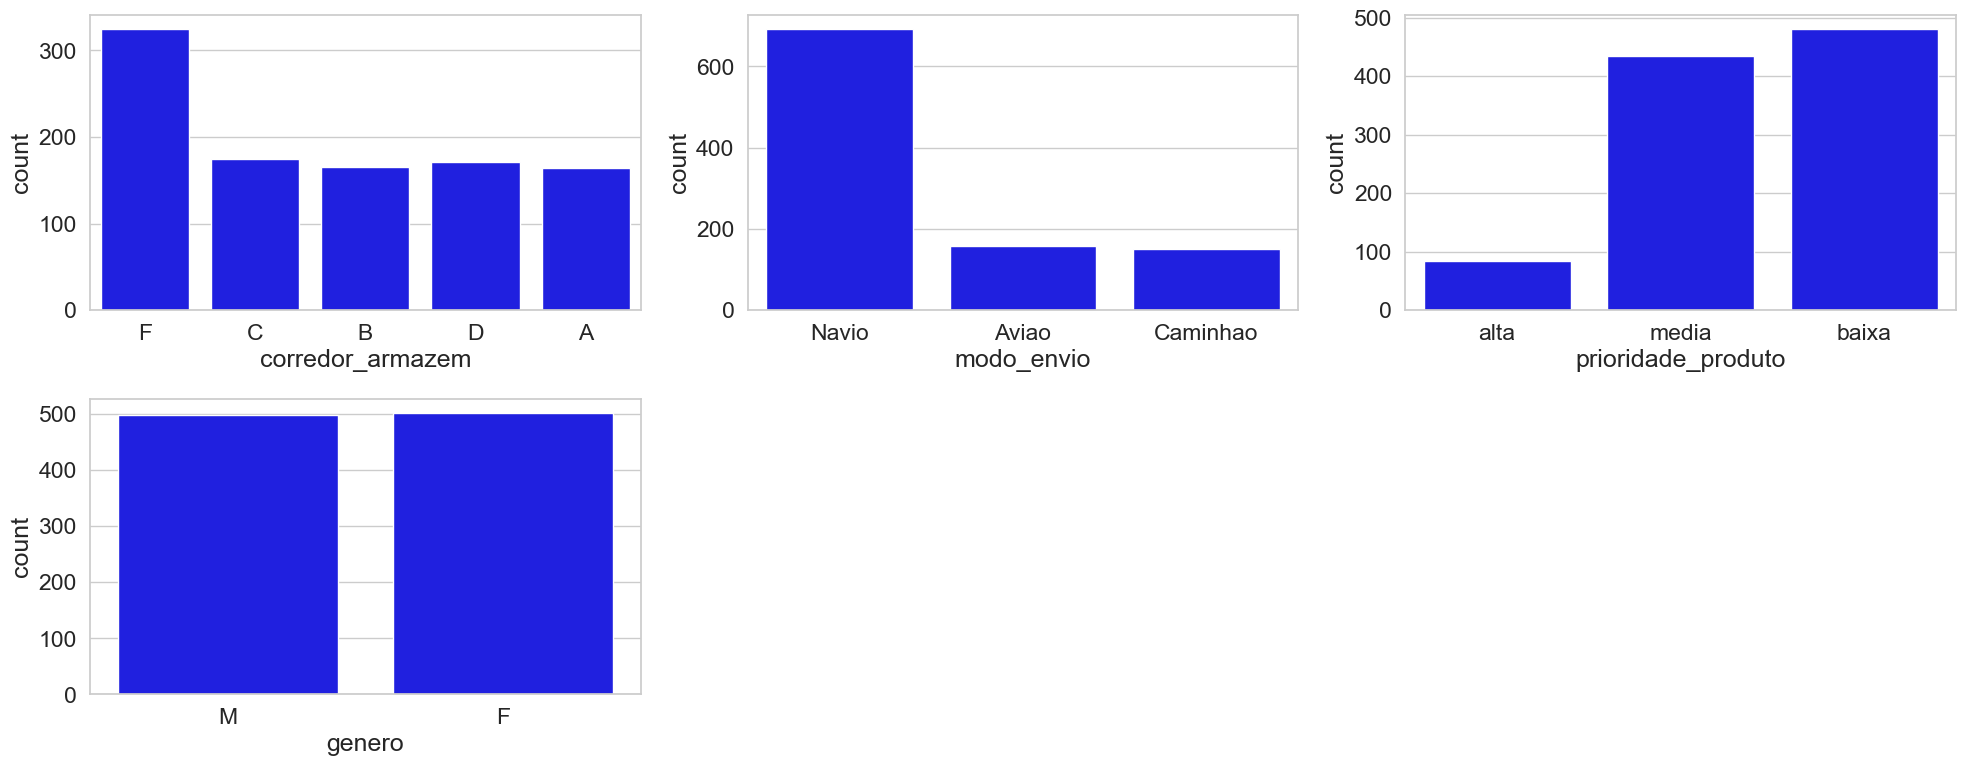

In [100]:
# Gráfico de barras para variáveis categóricas
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença bastante grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.

**Obs: Como as tarefas a seguir são complexas, demonstraremos apenas como algumas colunas. Fique à vontade para refazer a Engenharia de Atributos usando todas as colunas selecionadas conforme regras definidas acima.**

## Feature Extraction 

Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis.

In [101]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [102]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [103]:
# Cria uma cópia do dataframe
df_eng = df.copy()

In [104]:
df_eng.shape

(10643, 12)

In [105]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [106]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [107]:
# Criamos a variável e preenchemos com nan
df_eng['performance_prioridade_envio'] = np.nan

In [108]:
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável", 
    "Não Houve Atraso")))

In [109]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [110]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
7406,7407,A,Aviao,7,5,289,4,baixa,M,10,1385,0,Atraso Tolerável
6245,6246,F,Navio,5,5,216,4,media,F,1,4092,1,Não Houve Atraso
5256,5257,D,Navio,6,5,292,4,baixa,F,10,1969,1,Não Houve Atraso
10392,10393,D,Caminhao,4,2,156,3,media,M,1,4097,1,Não Houve Atraso
199,200,F,Navio,2,2,154,3,media,M,38,7846,1,Não Houve Atraso


In [111]:
# Agrupamos os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [112]:
# Ajustamos os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [113]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [114]:
# Novo ajuste nos nomes das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [115]:
# Replace do valor nan por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [116]:
# Concatena colunas criando uma terceira variável
df_report1["Total"] = df_report1["Total Atraso"] + df_report1["Total no Prazo"]
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [117]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


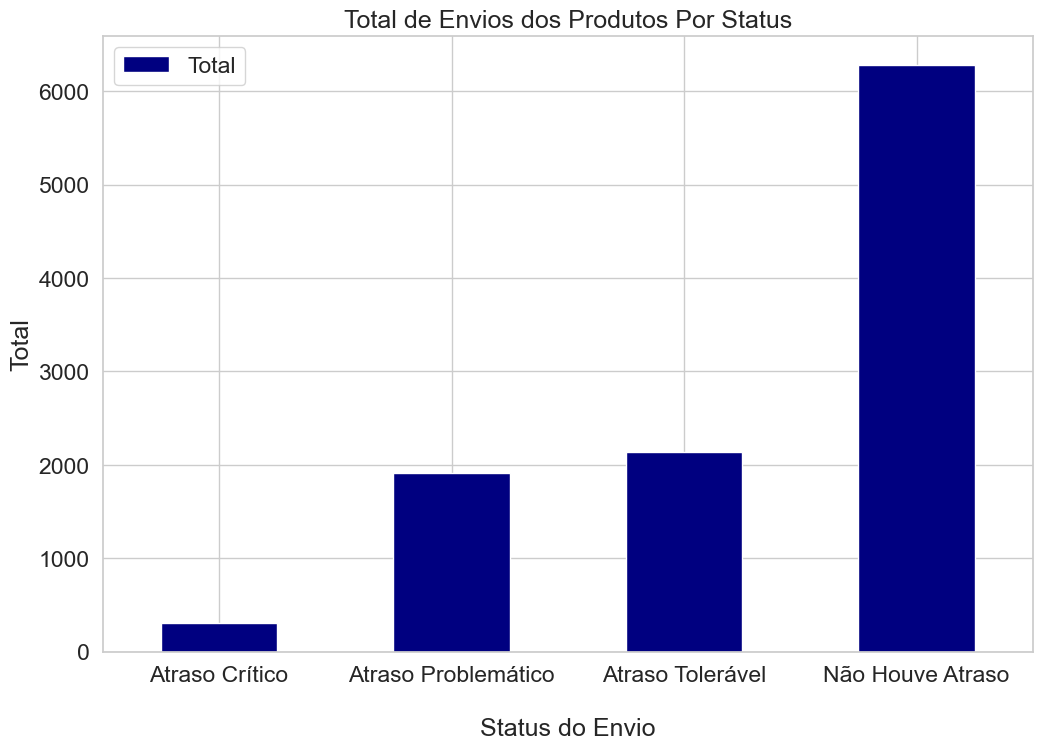

In [118]:
# Plot
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

### 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [119]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [120]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [121]:
# Solução
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [122]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
6112,6113,C,Navio,4,1,225,2,media,F,10,4577,1,Não Houve Atraso,Não Houve Atraso
6158,6159,A,Caminhao,4,5,182,3,media,F,2,4473,0,Atraso Problemático,Atraso Problemático na Entrega Por Caminhao
7618,7619,C,Navio,4,2,175,6,baixa,F,5,5445,1,Não Houve Atraso,Não Houve Atraso
268,269,C,Caminhao,3,5,241,3,baixa,F,21,3078,1,Não Houve Atraso,Não Houve Atraso
7726,7727,C,Navio,7,3,308,4,media,M,6,1113,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio


In [123]:
df_eng.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [124]:
# Agrupamos os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [125]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [126]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [127]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [128]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [129]:
# Concatena colunas criando uma terceira variável
df_report2["Total"] = df_report2["Total Atraso"] + df_report2["Total no Prazo"]
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0,1453.0
9,Não Houve Atraso,0.0,6282.0,6282.0


In [130]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2.head(10)

,Status do Envio,Total
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
2,Atraso Crítico na Entrega Por Navio,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
9,Não Houve Atraso,6282.0


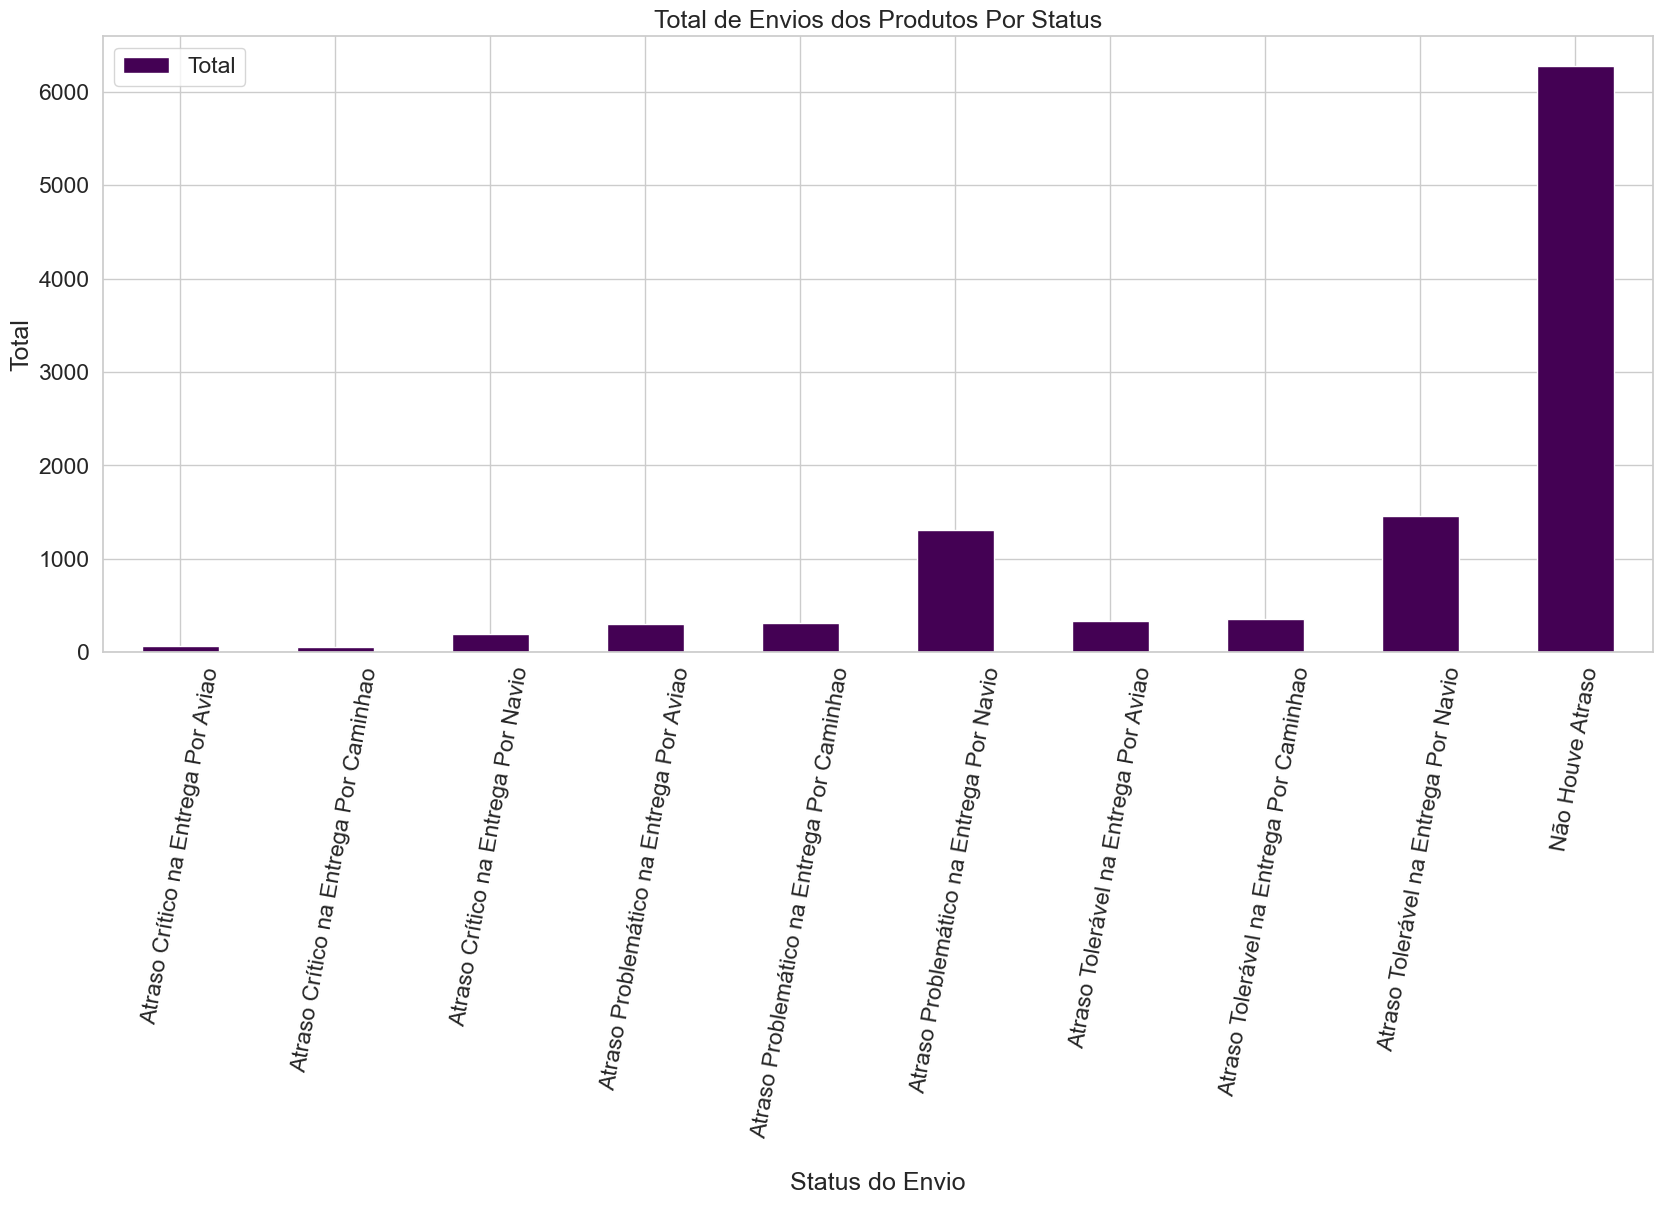

In [131]:
# Plot
df_report2.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [132]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
3168,3169,D,Navio,3,1,273,6,baixa,F,9,1198,1,Não Houve Atraso,Não Houve Atraso
10410,10411,D,Aviao,4,3,233,5,baixa,M,2,1079,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Aviao
6743,6744,F,Navio,6,3,165,5,media,M,5,4871,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
1601,1602,F,Navio,4,1,244,3,baixa,M,59,3073,1,Não Houve Atraso,Não Houve Atraso
2064,2065,D,Aviao,3,4,156,4,media,F,7,1492,1,Não Houve Atraso,Não Houve Atraso


In [133]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [134]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [135]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, "Desconto Acima da Media", "Desconto Abaixo da Media") 

In [136]:
df_eng['faixa_desconto'].value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [137]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
3478,3479,C,Navio,5,2,260,3,baixa,M,1,4799,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media
4370,4371,A,Caminhao,4,2,221,3,baixa,M,10,5632,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Caminhao,Desconto Abaixo da Media
6598,6599,C,Navio,4,3,264,5,media,M,3,1639,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media
6856,6857,C,Aviao,3,5,151,6,baixa,M,8,4692,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media
7585,7586,F,Navio,5,5,260,3,media,M,8,4586,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media


In [138]:
# Variável 2
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Acima da Media", 
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [139]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
7602,7603,D,Navio,4,3,147,3,media,M,1,5454,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
5228,5229,A,Navio,5,1,233,3,baixa,M,10,5289,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
10190,10191,A,Navio,5,5,235,5,baixa,M,8,1332,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
2723,2724,F,Caminhao,4,2,204,4,baixa,F,35,2725,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
9526,9527,C,Navio,4,2,241,6,media,M,5,4880,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media


In [140]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [141]:
# Agrupamos os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto', 
                             'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [142]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [143]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                             index = 'performance_faixa_desconto',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [144]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [145]:
# Replace do valor nan por zero
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [146]:
# Concatena colunas criando uma terceira variável
df_report3["Total"] = df_report3["Total Atraso"] + df_report3["Total no Prazo"]
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0,2374.0


In [147]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3.head()

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


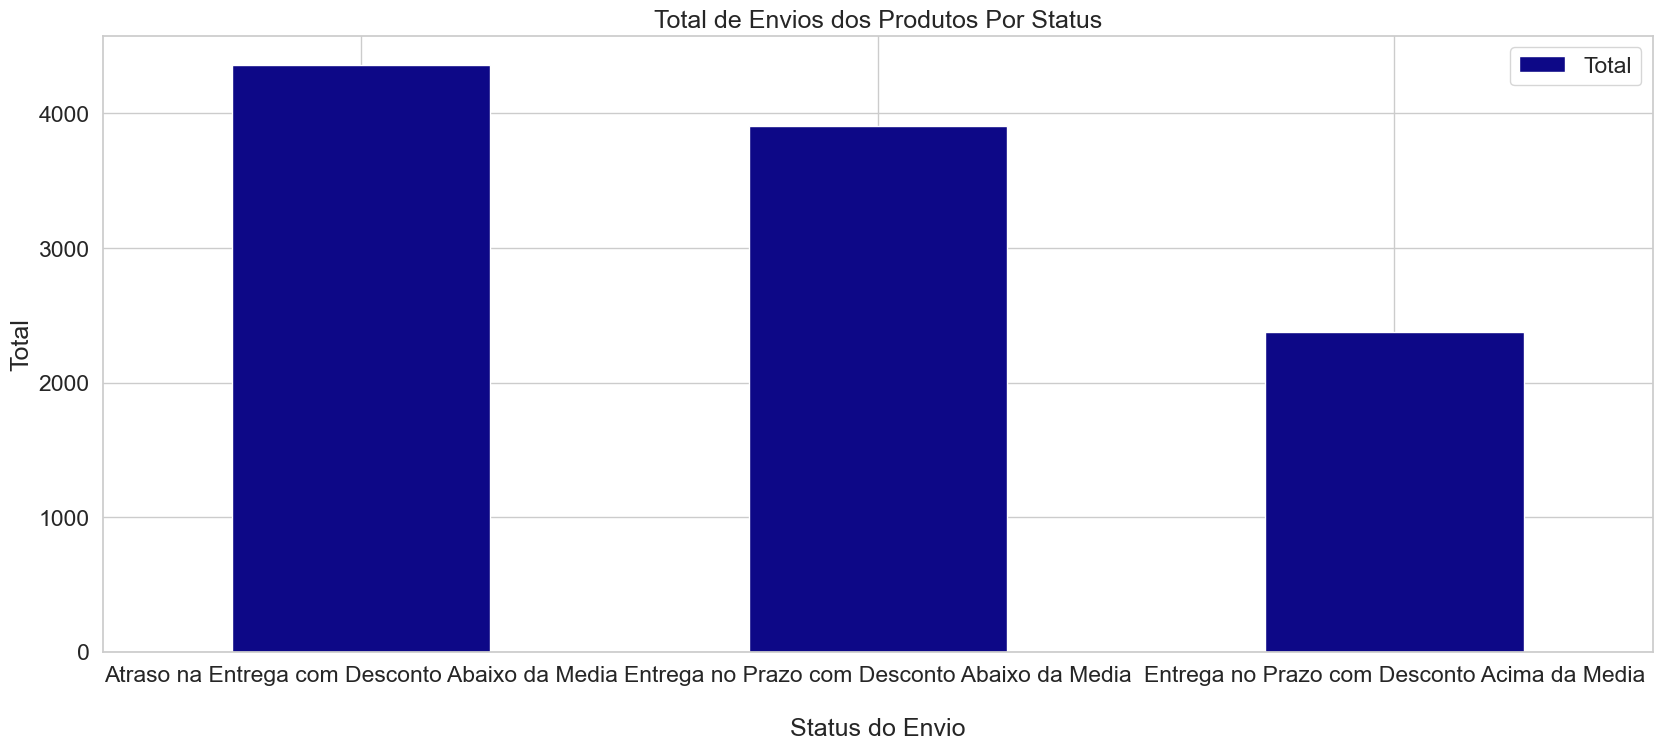

In [148]:
# Plot
df_report3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 0)
plt.show()

In [149]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
6172,6173,C,Aviao,5,1,225,3,baixa,M,8,4539,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Aviao,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
6934,6935,C,Navio,5,1,250,3,baixa,M,8,5845,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2365,2366,F,Navio,3,3,178,2,media,M,4,1778,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
7086,7087,D,Navio,4,1,266,4,baixa,M,3,5773,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
229,230,F,Navio,3,3,162,7,media,F,42,1278,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
7176,7177,D,Navio,7,5,282,5,baixa,M,8,1091,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
5259,5260,B,Navio,7,5,281,4,baixa,M,8,1987,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
7358,7359,A,Navio,4,1,139,3,media,M,7,4550,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
9375,9376,B,Navio,4,1,233,6,media,F,2,5406,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2162,2163,A,Navio,6,2,195,3,media,M,30,3462,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [150]:
# Salva o dataframe
df_eng.to_csv('dados/df_eng.csv', sep = ',', encoding = 'utf-8')

## Label Encoding

Label Encoding (codificação de rótulos) é uma técnica de codificação para lidar com
variáveis categóricas. Nesta técnica, a cada rótulo é atribuído um número inteiro exclusivo com 
base na ordem alfabética.
Na codificação de rótulos em Python, substituímos o valor categórico por um valor 
numérico entre 0 e o número de classes menos 1. Se o valor da variável categórica contiver 5 
classes distintas usamos (0, 1, 2, 3 e 4). Observe que os dados são modificados, mas sem perder 
a informação que eles representam.
Isso pode ser feito de maneira manual (usando dicionários em Python) ou com o 
algoritmo LabelEncoder do pacote Scikit-Learn. 

### Método 1

In [151]:
# Variável categórica ordinal
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [152]:
# Dicionário de mapeamento
dic_prioridade_produto = {'baixa' : 1, 'media' : 2, 'alta' : 0}

In [153]:
df_eng['prioridade_produto'] = df['prioridade_produto'].map(dic_prioridade_produto)

In [154]:
df_eng.prioridade_produto.value_counts()

1    5174
2    4587
0     882
Name: prioridade_produto, dtype: int64

In [155]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [156]:
# Variável categórica ordinal (passível de interpretação)
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [157]:
# Dicionário de mapeamento
dic_modo_envio = {'Navio' : 0, 'Aviao' : 1, 'Caminhao' : 2}

In [158]:
df_eng['modo_envio'] = df['modo_envio'].map(dic_modo_envio)

In [159]:
df.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [160]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


### Método 2

In [161]:
# Variável categórica nominal
df_eng.genero.value_counts()

F    5357
M    5286
Name: genero, dtype: int64

In [162]:
# Cria o objeto encoder
le = LabelEncoder()

In [163]:
# Treina o objeto (normalmente fazemos isso somente com dados de treino)
le.fit(df_eng.genero)

LabelEncoder()

In [164]:
list(le.classes_)

['F', 'M']

In [165]:
# Aplicamos o objeto encoder treinado 
# (fazemos isso em dados de treino e teste e também em novos dados usados no modelo)
df_eng.genero = le.transform(df.genero)

## One-Hot Encoding

One-Hot Encoding é outra técnica popular para tratar variáveis categóricas. Ele 
simplesmente cria recursos adicionais com base no número de valores exclusivos no recurso 
categórico. Cada valor exclusivo na categoria será adicionado como um recurso (uma nova 
variável).
Nessa abordagem, para cada categoria de um recurso, criamos uma nova coluna (às vezes 
chamada de variável fictícia) com codificação binária (0 ou 1) para indicar se uma determinada 
linha pertence a essa categoria.

In [166]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,0,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,1,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,1,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,1,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,0,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [167]:
# Variável categórica nominal
df_eng.corredor_armazem.value_counts()

F    3539
B    1778
D    1777
A    1777
C    1772
Name: corredor_armazem, dtype: int64

In [168]:
# Variável categórica nominal
df_eng.performance_prioridade_envio.value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [169]:
# Variável categórica nominal
df_eng.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [170]:
# Variável categórica nominal
df_eng.faixa_desconto.value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [171]:
# Variável categórica nominal
df_eng.performance_faixa_desconto.value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [172]:
# Aplicando One-Hot Encoding
for cat in ['corredor_armazem', 
            'performance_prioridade_envio', 
            'performance_modo_envio', 
            'faixa_desconto', 
            'performance_faixa_desconto']:
    onehots = pd.get_dummies(df_eng[cat], prefix = cat)
    df_eng = df_eng.join(onehots)

In [173]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance

In [175]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,D,1,4,2,177,3,1,0,44,...,0,0,0,0,1,0,1,0,0,1
1,2,F,1,4,5,216,2,1,1,59,...,0,0,0,0,1,0,1,0,0,1
2,3,A,1,2,2,183,4,1,1,48,...,0,0,0,0,1,0,1,0,0,1
3,4,B,1,3,3,176,4,2,1,10,...,0,0,0,0,1,1,0,0,1,0
4,5,C,1,2,2,184,3,2,0,46,...,0,0,0,0,1,0,1,0,0,1


In [176]:
# Não precisaremos mais das colunas originais após aplicar One-Hot Encoding
df_eng = df_eng.drop(columns = ['corredor_armazem', 
                        'performance_prioridade_envio', 
                        'performance_modo_envio', 
                        'faixa_desconto', 
                        'performance_faixa_desconto'])

In [177]:
# Podemos remover a coluna ID
df_eng = df_eng.drop(columns = ['ID'])

In [178]:
df_eng.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


## Fature Scaling

Leia os manuais em pdf no Capítulo 6. Abaixo um resumo:

- O dimensionamento de recursos (Fature Scaling) consiste em transformar o valor dos recursos em uma faixa semelhante, para que os algoritmos de aprendizado de máquina se comportem melhor, resultando em modelos ideais.

- Padronização e normalização são duas técnicas mais comuns para dimensionamento de recursos.

- A normalização é transformar os valores dos recursos para que caiam dentro dos intervalos limitados (min e max).

- A padronização é transformar os valores de recursos para cair em torno da média como 0 com desvio padrão como 1.

- A padronização mantém informações úteis sobre valores discrepantes e torna o algoritmo menos sensível a eles em contraste com o dimensionamento mínimo-máximo.

- A classe MinMaxScaler() de sklearn.preprocessing é usada para normalização de recursos.

- A classe StandardScaler() de sklearn.preprocessing é usada para padronização de recursos.

In [179]:
df_eng.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


In [180]:
df_eng.columns

Index(['modo_envio', 'numero_chamadas_cliente', 'avaliacao_cliente',
       'custo_produto', 'compras_anteriores', 'prioridade_produto', 'genero',
       'desconto', 'peso_gramas', 'entregue_no_prazo', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Navio',
       'performance_m

**ATENÇÃO**: No caso de normalizar o conjunto de dados de treinamento e teste, o estimador MinMaxScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [181]:
df_eng.peso_gramas.sample(5)

9123    4314
9382    5912
9462    5038
4410    4018
4663    4615
Name: peso_gramas, dtype: int64

In [182]:
df_eng['peso_gramas'] = MinMaxScaler().fit_transform(df_eng['peso_gramas'].values.reshape(len(df), 1))

In [183]:
df_eng.peso_gramas.sample(5)

6029    0.017677
8420    0.567421
1054    0.231556
1042    0.128853
98      0.015047
Name: peso_gramas, dtype: float64

In [184]:
df_eng.custo_produto.sample(5)

5662    237
2024    210
7888    212
3525    191
7966    261
Name: custo_produto, dtype: int64

In [185]:
df_eng['custo_produto'] = MinMaxScaler().fit_transform(df_eng['custo_produto'].values.reshape(len(df), 1))

In [186]:
df_eng.custo_produto.sample(10)

8358     0.836449
8155     0.598131
9103     0.733645
5134     0.471963
6511     0.588785
10553    0.383178
3414     0.757009
8206     0.514019
1396     0.182243
4780     0.691589
Name: custo_produto, dtype: float64

**ATENÇÃO**: No caso de padronizar o conjunto de dados de treinamento e teste, o estimador StandardScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [187]:
df_eng['desconto'] = StandardScaler().fit_transform(df_eng['desconto'].values.reshape(len(df), 1))

In [188]:
df_eng.desconto.sample(10)

2309     0.898654
7590    -0.368751
8569    -0.702279
8807    -0.768984
561      0.298304
10213   -0.502162
2833     1.432298
1202     0.565126
1539    -0.168635
4949    -0.502162
Name: desconto, dtype: float64

In [189]:
df_eng['numero_chamadas_cliente'] = StandardScaler().fit_transform(df_eng['numero_chamadas_cliente'].values.reshape(len(df), 
                                                                                                            1))

In [190]:
df_eng.numero_chamadas_cliente.sample(10)

7753     1.689011
8704    -0.930527
5651    -0.057348
10387    0.815832
5853     1.689011
1438    -0.930527
10930   -0.057348
5793     0.815832
2597    -0.930527
8753    -0.057348
Name: numero_chamadas_cliente, dtype: float64

In [191]:
df_eng['avaliacao_cliente'] = StandardScaler().fit_transform(df_eng['avaliacao_cliente'].values.reshape(len(df), 1))

In [192]:
df_eng.avaliacao_cliente.sample(10)

3233    1.423904
9298   -0.700376
9198    0.715811
5899    1.423904
6429   -1.408469
4023    0.715811
3184    0.007718
2242    0.715811
8762    0.715811
1506    0.007718
Name: avaliacao_cliente, dtype: float64

In [193]:
df_eng['compras_anteriores'] = StandardScaler().fit_transform(df_eng['compras_anteriores'].values.reshape(len(df), 1))

In [194]:
df_eng.compras_anteriores.sample(10)

2848    -1.135605
4124    -1.135605
1289    -0.359702
10272   -0.359702
8322     0.416201
2603    -1.135605
2044     1.192105
7601     0.416201
9343    -1.135605
963      1.192105
Name: compras_anteriores, dtype: float64

In [195]:
df_eng.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,-0.057348,-0.700376,0.378505,-0.359702,1,0,2.099353,0.033893,1,...,0,0,0,0,1,0,1,0,0,1
1,1,-0.057348,1.423904,0.560748,-1.135605,1,1,3.099936,0.304894,1,...,0,0,0,0,1,0,1,0,0,1
2,1,-1.803706,-0.700376,0.406542,0.416201,1,1,2.366175,0.346676,1,...,0,0,0,0,1,0,1,0,0,1
3,1,-0.930527,0.007718,0.373832,0.416201,2,1,-0.168635,0.025712,1,...,0,0,0,0,1,1,0,0,1,0
4,1,-1.803706,-0.700376,0.411215,-0.359702,2,0,2.232764,0.216654,1,...,0,0,0,0,1,0,1,0,0,1


In [196]:
df.to_csv('dados/dataset_final.csv', sep = ',', encoding = 'utf-8')